In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/category_predictions.csv')
print(df.shape)
df.head()

(84825, 318)


,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,...,6 - Water availability - k_prediction,6 - Water availability - k_prediction_binary,6 - Temperature - mean_prediction,6 - Temperature - std_prediction,6 - Temperature - lower_pred,6 - Temperature - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - std_prediction,6 - Precipitation - lower_pred,6 - Precipitation - upper_pred
0,0,136746,"Grasslands, one of the most widespread land co...",Dynamic of grassland vegetation degradation an...,Grassland degradation; Climate change; Human i...,['Ecology'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1284614,Tree-ring width chronologies from the upper ti...,Separating temperature from precipitation sign...,Northeastern Tibetan Plateau; Tree-ring width;...,"['Geography, Physical; Geosciences, Multidisci...",0.0,0.0,0.0,0.0,...,NaN,NaN,1.000000,0.000000,1.0,1.000000,0.333333,0.471405,0.0,0.804738
2,2,1344242,This study examines the spatial and temporal p...,GIS analysis of spatial and temporal patterns ...,fire; geographic information systems; manageme...,['Forestry'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,289649,"Permafrost, mainly of discontinuous type, that...","Thermokarst lake, hydrological flow and water ...",Permafrost; Thermokarst lakes; Hydrological cy...,"['Engineering, Civil; Geosciences, Multidiscip...",0.0,0.0,0.0,0.0,...,NaN,NaN,0.166667,0.372678,0.0,0.539345,1.000000,0.000000,1.0,1.000000
4,4,399966,"Since 2005, Morocco has designated 28 Importan...",Factors Influencing Species-Richness of Breedi...,Breeding waterfowl; Diversity; Spatial scale; ...,['Ecology; Environmental Sciences'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0        2014.0
1        2018.0
2        2001.0
3        2012.0
4        2015.0
          ...  
93985    2011.0
93986    1996.0
93987    2016.0
93988    2016.0
93989    2019.0
Name: PY, Length: 93990, dtype: float64

In [6]:
doc_continents = pd.read_csv('../data/doc_continents.csv')
df = df.merge(doc_continents, how="outer", left_on="id", right_on="doc_id")
df.shape

(93990, 320)

In [11]:
continents = df.groupby('continent').size().sort_values()
continents

continent
South America     3023
Oceania           4294
Africa            4513
Europe            9935
Asia             14424
North America    17590
dtype: int64

In [21]:
df[pd.isna(df["continent"])]

,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,...,6 - Temperature - mean_prediction,6 - Temperature - std_prediction,6 - Temperature - lower_pred,6 - Temperature - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - std_prediction,6 - Precipitation - lower_pred,6 - Precipitation - upper_pred,doc_id,continent
1,1,1284614,Tree-ring width chronologies from the upper ti...,Separating temperature from precipitation sign...,Northeastern Tibetan Plateau; Tree-ring width;...,"['Geography, Physical; Geosciences, Multidisci...",0.0,0.0,0.0,0.0,...,1.000000,0.000000,1.0,1.000000,0.333333,0.471405,0.0,0.804738,NaN,NaN
3,3,289649,"Permafrost, mainly of discontinuous type, that...","Thermokarst lake, hydrological flow and water ...",Permafrost; Thermokarst lakes; Hydrological cy...,"['Engineering, Civil; Geosciences, Multidiscip...",0.0,0.0,0.0,0.0,...,0.166667,0.372678,0.0,0.539345,1.000000,0.000000,1.0,1.000000,NaN,NaN
4,4,399966,"Since 2005, Morocco has designated 28 Importan...",Factors Influencing Species-Richness of Breedi...,Breeding waterfowl; Diversity; Spatial scale; ...,['Ecology; Environmental Sciences'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1552882,Clarifying spatiotemporal variations of litter...,Spatiotemporal variations in litter mass and t...,Temperate grassland; Litter mass; Remote sensi...,"['Engineering, Aerospace; Astronomy & Astrophy...",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,335408,Global environmental changes can create novel ...,How Will Global Environmental Changes Affect t...,alien plants; climate change; life forms; meta...,['Plant Sciences'],0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93970,84809,1811960,"Using TM remote sensing image data 2000, 2005,...",Analysis on Dynamic Changes Characteristics of...,Maowusu sandy land; vegetation coverage; tempe...,"['Computer Science, Information Systems; Envir...",0.0,0.0,0.0,0.0,...,1.000000,0.000000,1.0,1.000000,0.333333,0.471405,0.0,0.804738,NaN,NaN
93975,84812,1302808,Recent climatic warming and associated glacial...,Combined Flow Abstraction and Climate Change I...,0,['Environmental Sciences; Limnology; Water Res...,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
93981,84817,162227,Seasonal mass balance components b(w) (winter ...,Analysis of winter and summer glacier mass bal...,0,"['Geography, Physical; Geology']",0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93984,84820,502741,"Saplings of alder (Alnus glutinosa), birch (Be...",Species-Specific Responses to Ozone and Drough...,Air pollution; Climate change; Ozone; Deciduou...,['Environmental Sciences; Meteorology & Atmosp...,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
py_range = range(1990,2023)
y = []
cumsum = False
for c in continents.index:
    cy = []
    for py in py_range:
        cy.append(df.loc[(df['continent']==c) & (df["PY"]==py)].shape[0])
    cy = np.array(cy)
    if cumsum:
        cy = cy.cumsum()
    y.append(cy)

include_na = True
if include_na:
    cy = []
    for py in py_range:
        cy.append(df.loc[(pd.isna(df['continent']) & (df['PY']==py))].shape[0])
    cy = np.array(cy)
    if cumsum:
        cy = cy.cumsum()
    y.append(cy)
    labels = list(continents.index) + ["Unknown"]
y = np.array(y)

9565

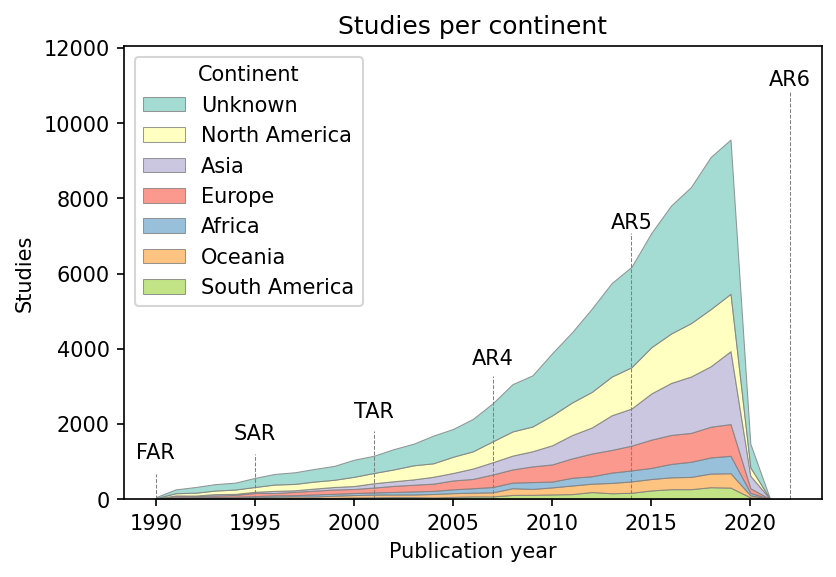

In [132]:
fig, ax = plt.subplots(dpi=150)

cols = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
cols.reverse()

ax.stackplot(py_range, y, labels=labels, alpha=0.8, colors=cols, edgecolor="grey", linewidth=0.5)

ah, al = ax.get_legend_handles_labels()
ax.legend(ah[::-1], al[::-1], title='Continent', loc='upper left')

report_dates = [1990, 1995, 2001, 2007, 2014, 2022]
report_labels = ["FAR", "SAR", "TAR", "AR4", "AR5", "AR6"]

ymax = y.sum(axis=0).max()*1.2

for d, l in zip(report_dates, report_labels):
    idx = py_range.index(d)
    if l=="AR6":
        ax.axvline(d, ymax=0.9,color="grey",lw=0.5, ls="--")
        ax.text(d, ymax*0.95, l, va="bottom", ha="center")
    else:
        ax.axvline(d, ymax=y[:,idx].sum()/ymax+0.05,color="grey",lw=0.5, ls="--")
        ax.text(d, y[:,idx].sum()+ ymax*0.08, l, va="bottom", ha="center")
    
if cumsum:
    ax.set_title("Cumulative sum of studies per continent")   
else:
    ax.set_title("Studies per continent")
    

ax.set_ylabel("Studies")
ax.set_xlabel("Publication year")

ax.set_ylim(ymax=ax.get_ylim()[1]*1.2)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


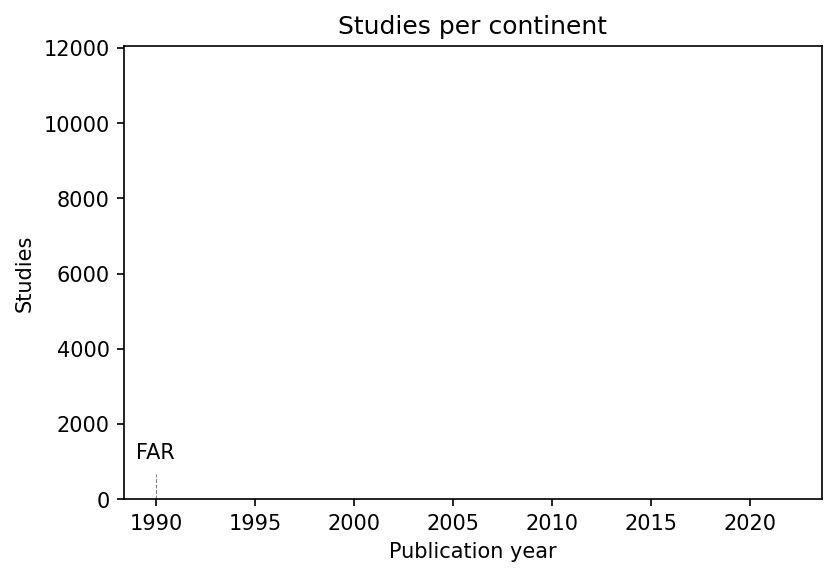

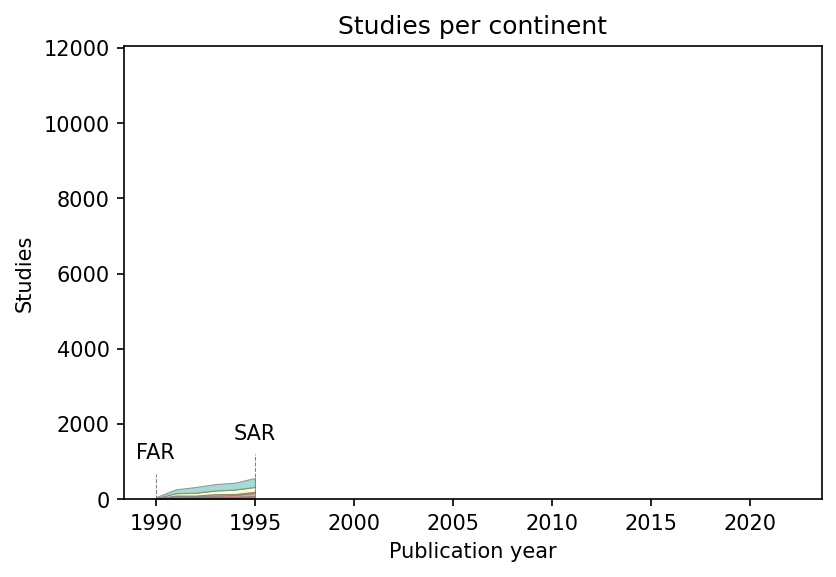

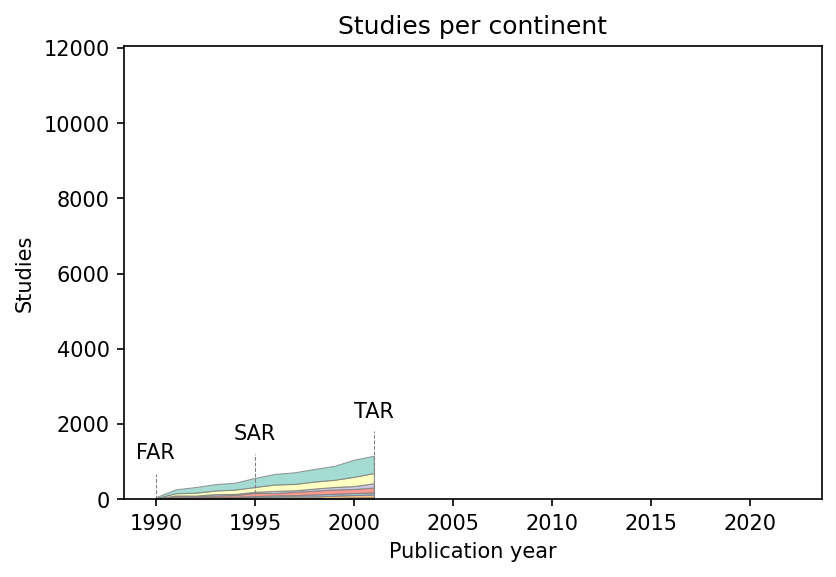

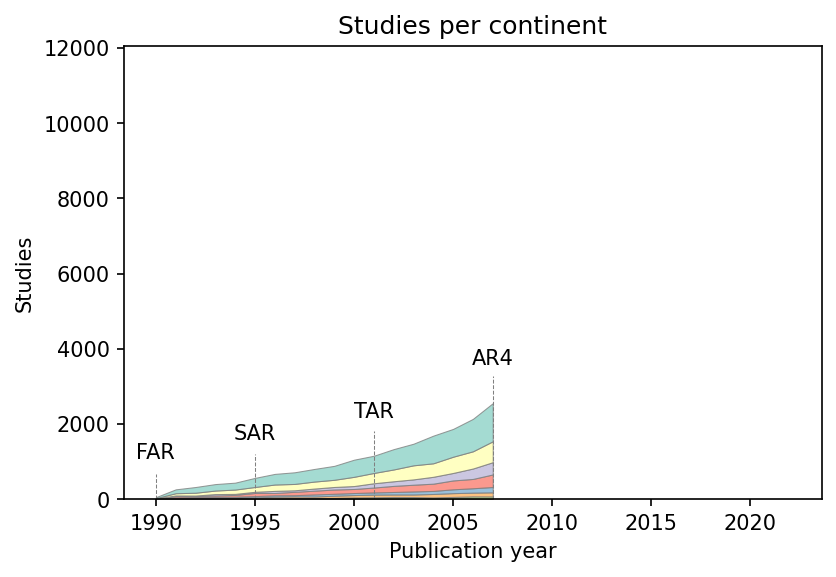

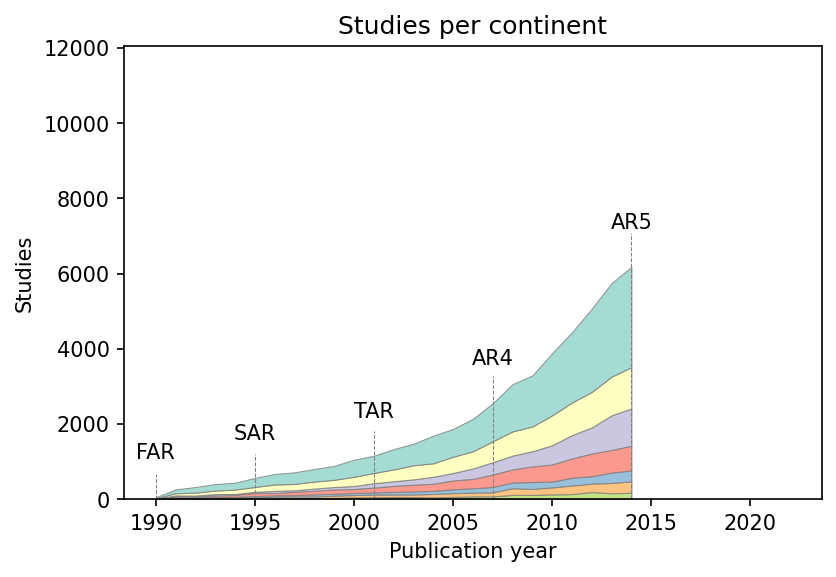

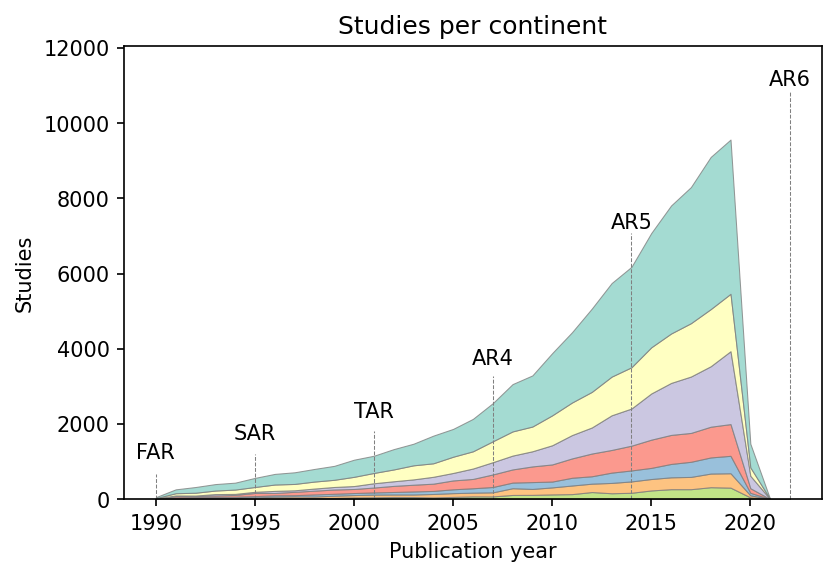

In [137]:
for i, date in enumerate(report_dates):
    
    fig, ax = plt.subplots(dpi=150)
    
    idx = py_range.index(date)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.stackplot(py_range[:idx+1], y[:,:idx+1], labels=labels, alpha=0.8, colors=cols, edgecolor="grey", linewidth=0.5)
    
    for d, l in zip(report_dates[:i+1], report_labels[:i+1]):
        idx = py_range.index(d)
        if l=="AR6":
            ax.axvline(d, ymax=0.9,color="grey",lw=0.5, ls="--")
            ax.text(d, ymax*0.95, l, va="bottom", ha="center")
        else:
            ax.axvline(d, ymax=y[:,idx].sum()/ymax+0.05,color="grey",lw=0.5, ls="--")
            ax.text(d, y[:,idx].sum()+ ymax*0.08, l, va="bottom", ha="center")
            
            
    if cumsum:
        ax.set_title("Cumulative sum of studies per continent")   
    else:
        ax.set_title("Studies per continent")


    ax.set_ylabel("Studies")
    ax.set_xlabel("Publication year")